In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

ove importe koristimo kako bi vizualizuovali, klasificirali podatke 

In [ ]:
iris = pd.read_csv('Iris.csv')
iris.head(100)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [ ]:
# sad identifikujemo koje su nam kolone korisne za predikciju i stavljamo ih u array
column_list = []
for i in iris.columns:
  column_list.append(i)

# iteriramo kroz kolone i dodajemo ih u niz, species micemo iz niza jer je output,
# kao i id jer nam nije potreban za predikciju i treba nam samo 4 kolone
del column_list[5]
del column_list[0]

column_list

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [ ]:
# definisemo x i y inpute u decission tree
x = iris[column_list]
y = iris['Species']

print(x)
print(y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-

In [ ]:
# dijelimo podatke u training i testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
# x - features po kojima pravimo predikciju, y - labela, test_size = 70% za trening / 30% za test, 
# rand da bi vidjeli da ih mozemo ponovo pozvati

In [ ]:
clf = DecisionTreeClassifier()
# treniramo podatke (70% podataka)
clf = clf.fit(X_train, y_train)
# predikcija(na osnovu X_test predvidjamo sta ce y biti)
y_pred = clf.predict(X_test)

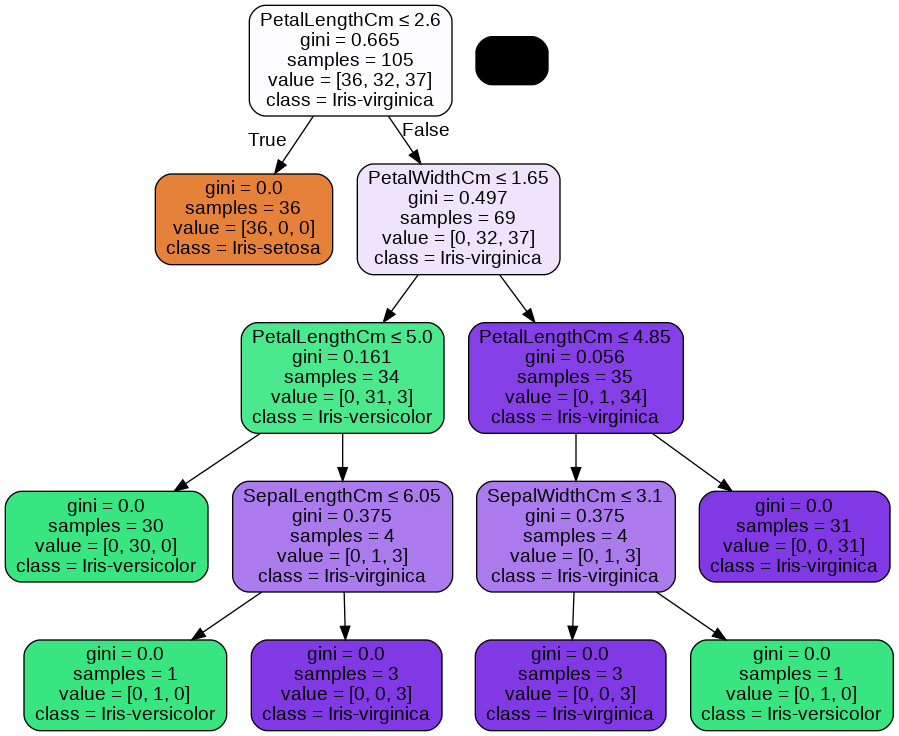

In [ ]:
# vizualizacija

# dot_data kreira fajl kojem saljemo sliku naseg decisionTree-a
dot_data = StringIO()

# biblioteka za vizualizaciju
# cfl - decisionTree, out_file - fajl u koji eksportujemo podatke
# ostali argumenti su za formatiranje, izgled, font
# column_list - nase featured data, class_name - Species, koje koristimo za klasifikaciju
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = column_list, class_names=[
                    'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
                ])

# pydotplus da graficki predstavi nase stablo
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# eksportuje ga u png
graph.write_png('iris.png')

# rezultat
Image(graph.create_png())